# Modeling

Here a logistic regression model is created.

In [3]:
#Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Libs for modeling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
DATA_FEATURED_DIR = os.path.join(os.getcwd(), os.pardir, 'data_sent_github')
print(DATA_FEATURED_DIR)

/work/churn_predictive_model/notebooks/../data_sent_github


In [8]:
df = pd.read_csv(DATA_FEATURED_DIR+'/featured_dataset.csv', index_col=[0])

In [9]:
df.head()

,index,EstimatedSalary_scaled,Score_scaled,Value_scaled,client_age_scaled,France,Germany,Spain,Female,Male,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0,Products_Product A,Products_Product B,Products_Product C,Products_Product D,eligible
0,0,0.403426,0.616223,4.855382e-18,0.297297,0,0,1,0,1,0,1,1,0,0,1,0,0,1
1,1,0.007484,0.378935,3.193980e-01,0.337838,0,0,1,0,1,0,1,0,1,0,0,0,1,0
2,2,0.190401,0.509685,1.157224e-01,0.364865,1,0,0,0,1,1,0,0,1,0,1,0,0,0
3,3,0.397088,0.644068,2.465286e-01,0.067568,0,1,0,0,1,0,1,1,0,1,0,0,0,1
4,4,0.564614,0.433414,4.855382e-18,0.027027,0,1,0,1,0,1,0,1,0,0,0,0,1,0


In [10]:
df.columns

Index(['index', 'EstimatedSalary_scaled', 'Score_scaled', 'Value_scaled',
       'client_age_scaled', 'France', 'Germany', 'Spain', 'Female', 'Male',
       'HasCrCard_0.0', 'HasCrCard_1.0', 'IsActiveMember_0.0',
       'IsActiveMember_1.0', 'Products_Product A', 'Products_Product B',
       'Products_Product C', 'Products_Product D', 'eligible'],
      dtype='object')

In [12]:
feature_cols = ['EstimatedSalary_scaled',
                'Score_scaled',
                'Value_scaled',
                'client_age_scaled',
                'France',
                'Germany',
                'Spain',
                'Female',
                'Male',
                'HasCrCard_0.0',
                'HasCrCard_1.0',
                'IsActiveMember_0.0',
                'IsActiveMember_1.0',
                'Products_Product A',
                'Products_Product B',
                'Products_Product C',
                'Products_Product D']

In [13]:
x = df[feature_cols]
y = df['eligible']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [15]:
log_reg = LogisticRegression(max_iter=len(X_train))
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=86594)

In [16]:
y_pred = log_reg.predict(X_test)

In [17]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## Evaluation

In [18]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[    0,  5993],
       [    0, 22872]])

In [19]:
df_cnf_matrix = pd.DataFrame(cnf_matrix)
df_cnf_matrix

,0,1
0,0,5993
1,0,22872


<AxesSubplot:title={'center':'Confusion Matrix'}>

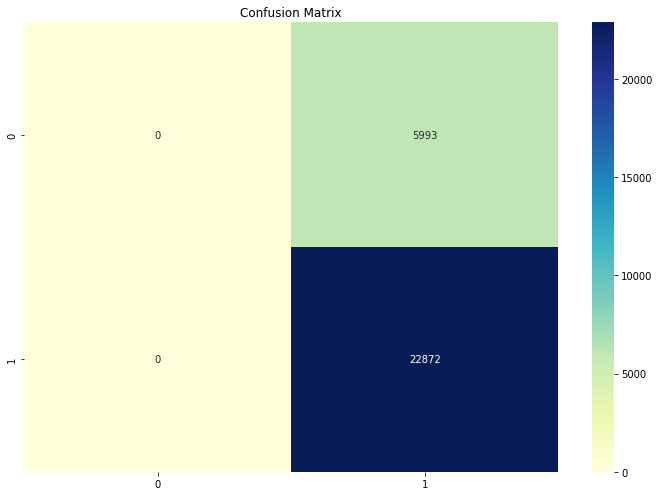

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Confusion Matrix')
plt.tight_layout()
sns.heatmap(df_cnf_matrix, annot=True, fmt='g', cmap="YlGnBu")

* 22872 true positives.
* 5993 false positives.
* 0 true negatives.
* 0 false negatives.

In [20]:
metrics.accuracy_score(Y_test, y_pred)

0.7923783128356141

The logistic regression model has an accuracy of `79.24%`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb2ec55e-ada8-4de4-93de-2d05f236c13b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>